In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path ="/content/drive/MyDrive/data/train"
valid_path = "/content/drive/MyDrive/data/val"
categories= ["central india","West Indian Temples","East Indian Temples","north east india", "north india","South Indian Temples" ]

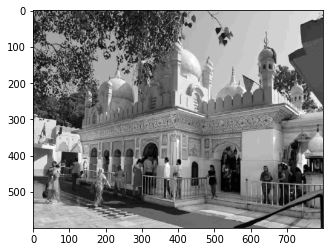

In [4]:
for category in categories :
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
training_data = []

def create_training_data():
    for category in categories :
        path = os.path.join(train_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (224,224))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data() 

In [6]:
test_data = []

def create_test_data():
     for category in categories :
        path = os.path.join(valid_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (224,224))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_test_data()

In [7]:
len(training_data),len(test_data)

(491, 192)

In [8]:
import random 
random.shuffle(training_data)
random.shuffle(test_data)

In [9]:
X_train= []
y_train= []

for feature,label in training_data:
    X_train.append(feature)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1,224,224,1)

In [ ]:
y_train=np.array(y_train).reshape(-1,1)
y_train = to_categorical(y_train, num_classes=6)

In [ ]:
X_train.shape, y_train.shape

((491, 224, 224, 1), (491, 6))

In [ ]:
X_test= []
y_test= []

for feature,label in test_data:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1,224,224,1)

In [ ]:
y_test= np.array(y_test).reshape(-1,1)
y_test = to_categorical(y_test, num_classes=6)

In [ ]:
X_test.shape, y_test.shape

((192, 224, 224, 1), (192, 6))

In [ ]:
#normalizing the images
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
#building CNN model from scratch
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape= X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
16/16 [==============================] - 61s 4s/step - loss: 3.4456 - accuracy: 0.1466 - val_loss: 1.7912 - val_accuracy: 0.2083
Epoch 2/10
16/16 [==============================] - 60s 4s/step - loss: 1.7904 - accuracy: 0.2077 - val_loss: 1.7805 - val_accuracy: 0.3281
Epoch 3/10
16/16 [==============================] - 61s 4s/step - loss: 1.7648 - accuracy: 0.2342 - val_loss: 1.6444 - val_accuracy: 0.3906
Epoch 4/10
16/16 [==============================] - 60s 4s/step - loss: 1.5969 - accuracy: 0.3462 - val_loss: 1.4405 - val_accuracy: 0.5573
Epoch 5/10
16/16 [==============================] - 59s 4s/step - loss: 1.3213 - accuracy: 0.5458 - val_loss: 0.9516 - val_accuracy: 0.7135
Epoch 6/10
16/16 [==============================] - 60s 4s/step - loss: 0.8740 - accuracy: 0.7373 - val_loss: 0.5652 - val_accuracy: 0.8854
Epoch 7/10
16/16 [==============================] - 63s 4s/step - loss: 0.4880 - accuracy: 0.8819 - val_loss: 0.3572 - val_accuracy: 0.9427
Epoch 8/10
16/16 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 activation (Activation)     (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

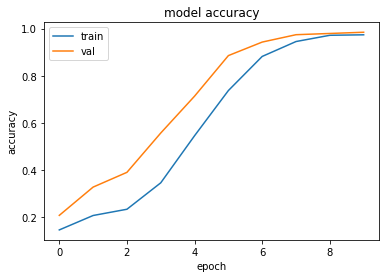

In [ ]:
#ploting the accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

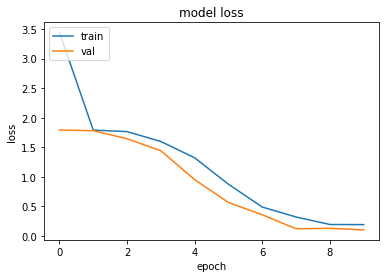

In [ ]:
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/data/CNN_model.h5')

In [ ]:
def prepare(filepath):
    IMG_SIZE=224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model('/content/drive/MyDrive/data/CNN_model.h5')

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/data/test/East Indian Temples/East_India.99.jpg")])

1/1 [==============================] - 0s 61ms/step


In [ ]:
#predicting the class
for i in range(1):
    for j in range(5):
        if(int(prediction[i][j])):
            print('Predicted class is',categories[j])

Predicted class is East Indian Temples
